# Zestaw zadań: Kwadratury
## Zadanie 1
### Autor: Artur Gęsiarz

In [794]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz, simps

### Funkcja podcalkowa

In [795]:
def f(x):
    return 4 / (1 + x ** 2)

### Dokladnie wartosc calki pi

In [796]:
exact_value = np.pi

### Zakres wartosci m

In [797]:
m_values = np.arange(1, 26)

### Lista przechowujaca liczby wezlow dla kolejnych wartosci m

In [798]:
num_nodes_list = []

### Wyniki calkowania

In [799]:
integral_mid_list = []
integral_trap_list = []
integral_simp_list = []

### Przechowywanie bledow

In [800]:
errors_mid_list = []
errors_trap_list = []
errors_simp_list = []

### Pętla po wartościach m

In [801]:
for m in m_values:
    # Obliczenie liczby węzłów
    num_nodes = 2 ** m + 1
    num_nodes_list.append(num_nodes)

    # Rozmieszczenie równoodległych węzłów
    x = np.linspace(0, 1, num_nodes)

    # Złożona kwadratura otwarta prostokątów (metoda mid-point)
    dx = (1 - 0) / num_nodes
    x_mid = (x[:-1] + x[1:]) / 2
    integral_mid = np.sum(f(x_mid) * dx)
    integral_mid_list.append(integral_mid)

    # Złożona kwadratura trapezów
    integral_trap = trapz(f(x), x)
    integral_trap_list.append(integral_trap)

    # Złożona kwadratura Simpsona
    integral_simp = simps(f(x), x)
    integral_simp_list.append(integral_simp)

    errors_mid_list.append(abs((np.pi - integral_mid_list[m-1]) / np.pi))
    errors_trap_list.append(abs((np.pi - integral_trap_list[m-1]) / np.pi))
    errors_simp_list.append(abs((np.pi - integral_simp_list[m-1]) / np.pi))

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_73069/3956593400.py:16: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral_trap = trapz(f(x), x)
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_73069/3956593400.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simp = simps(f(x), x)


### Rysowanie wykresu

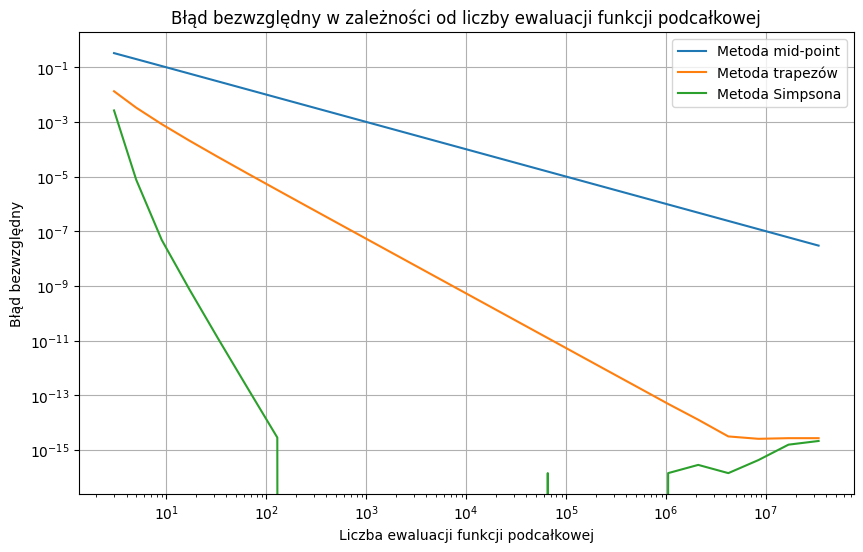

In [802]:
plt.figure(figsize=(10, 6))
plt.semilogy(num_nodes_list, errors_mid_list, label='Metoda mid-point')
plt.semilogy(num_nodes_list, errors_trap_list, label='Metoda trapezów')
plt.semilogy(num_nodes_list, errors_simp_list, label='Metoda Simpsona')
plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

### Obliczenie wartości ponizej ktorej zmniejsze kroku h nie zmniejsza juz bledu kwadratury dla posczegolnych metod

### Dla metody trapezow

In [803]:
hmin_index = np.argmin(errors_mid_list)
hmin_trap = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_trap)

Wartość hmin: 2.980232149951692e-08


### Dla metody Simpsona

In [804]:
hmin_index = np.argmin(errors_simp_list)
hmin_simp = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_simp)

Wartość hmin: 0.0038910505836575876


### Dla metody mid-point

In [805]:
hmin_index = np.argmin(errors_mid_list)
hmin_midpoint = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_midpoint)

Wartość hmin: 2.980232149951692e-08


### Funkcja do obliczenia rzedu zbieznosci

In [806]:
def calculate_convergence_order(errors, hs):
    p_values = []

    for i in range(len(errors) - 1):
        if errors[i] == 0 or errors[i+1] == 0:
            continue
        p = np.abs(np.log(errors[i+1] / errors[i]) / np.log(hs[i+1] / hs[i]))
        p_values.append(p)

    return p_values

In [807]:
hs = np.logspace(-15, -1, 70)

In [808]:
p_values_trapezoidal = calculate_convergence_order(errors_trap_list, hs)
p_values_simp = calculate_convergence_order(errors_simp_list, hs)
p_values_mid = calculate_convergence_order(errors_mid_list, hs)

In [809]:
print("Rząd zbieznosci dla metody trapezów: ",np.mean(p_values_trapezoidal))
print("Rząd zbieznosci dla metody Simpsona: ",np.mean(p_values_simp))
print("Rząd zbieznosci dla metody mid-point: ",np.mean(p_values_mid))

Rząd zbieznosci dla metody trapezów:  2.6161996872169127
Rząd zbieznosci dla metody Simpsona:  6.159188821106088
Rząd zbieznosci dla metody mid-point:  1.4462996673274364
